In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1. Import Dependencies

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set style and display options
plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### 2. Load Prepared Data

In [3]:
# Load data from previous notebook
df = pd.read_csv(r'D:\MY\Personal Projects\Zuu-Crew Projects\Building Production Ready ML Systems\Advance Telco Customer Churn Prediction\notebooks\artifacts\processed\telco_data_prepared.csv')
print(f"Dataset loaded: {df.shape}")
df.head()

Dataset loaded: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Recreate feature categories
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
account_features = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
financial_features = ['MonthlyCharges', 'TotalCharges']

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Churn')
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

### 3. Univariate Analysis - Target Variable

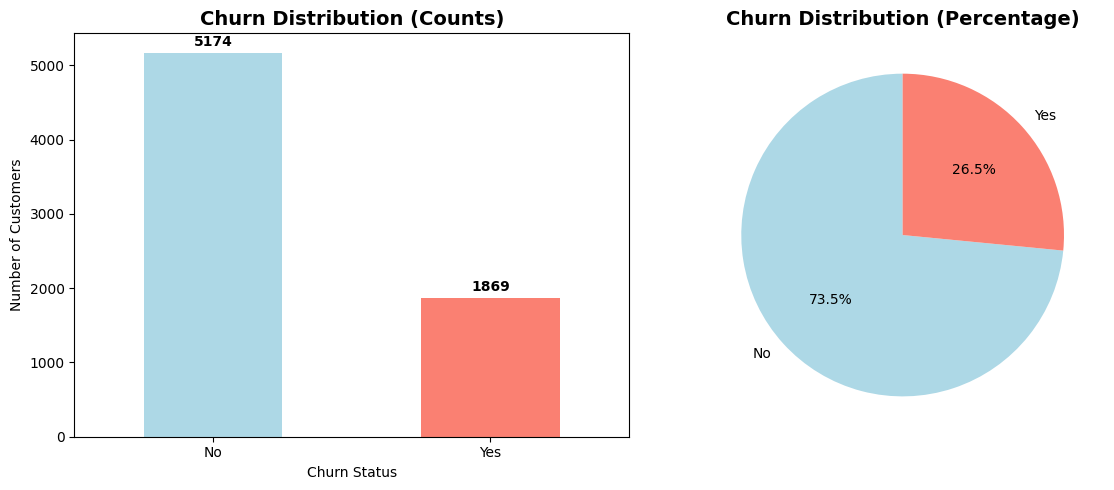

Churn Rate: 26.5%
Retention Rate: 73.5%
Class Imbalance Ratio: 2.8:1


In [5]:
# Target variable distribution
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Churn Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=0)

# Add count labels
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['lightblue', 'salmon']
wedges, texts, autotexts = axes[1].pie(churn_counts.values, labels=churn_counts.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Churn Rate: {churn_pct['Yes']:.1f}%")
print(f"Retention Rate: {churn_pct['No']:.1f}%")
print(f"Class Imbalance Ratio: {churn_counts['No']/churn_counts['Yes']:.1f}:1")

### 4. Univariate Analysis - Numerical Features

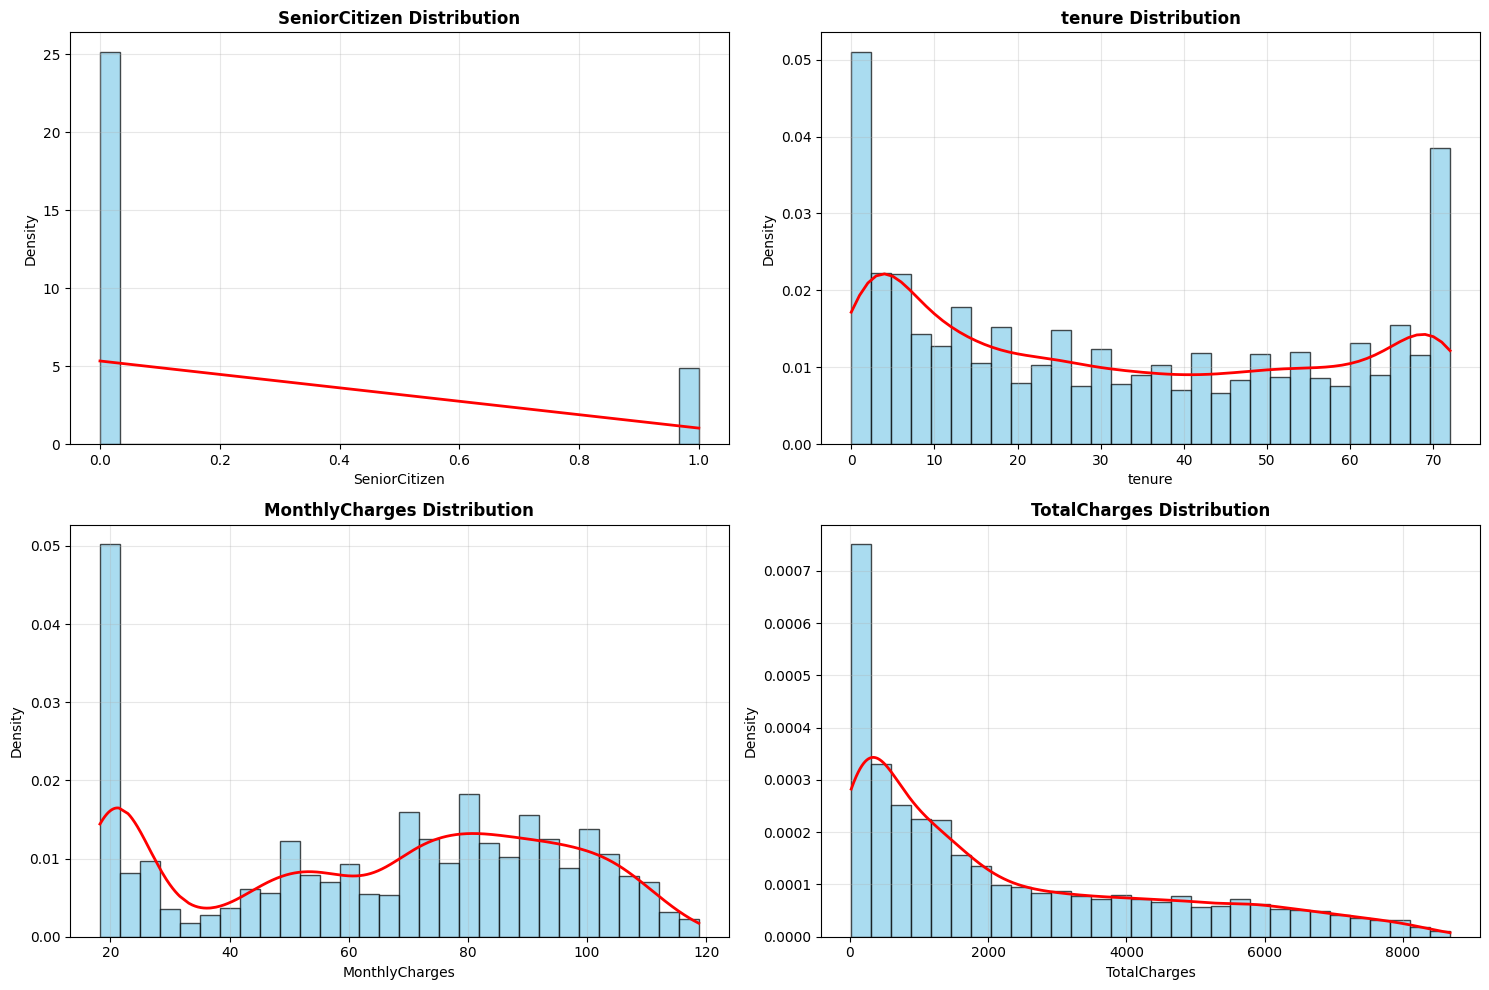

In [6]:
# Distribution analysis for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Remove missing values for plotting
    data = df[feature].dropna()
    
    # Histogram with KDE
    axes[i].hist(data, bins=30, alpha=0.7, color='skyblue', density=True, edgecolor='black')
    axes[i].plot(data.sort_values(), stats.gaussian_kde(data)(data.sort_values()), 'r-', linewidth=2)
    axes[i].set_title(f'{feature} Distribution', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Statistical summary for numerical features
print("Numerical Features - Statistical Summary:")
print("=" * 50)
numeric_stats = df[numerical_features].describe()
print(numeric_stats)

# Additional statistics
print("\nAdditional Statistics:")
for feature in numerical_features:
    data = df[feature].dropna()
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f"{feature:15s} - Skewness: {skewness:6.2f}, Kurtosis: {kurtosis:6.2f}")

Numerical Features - Statistical Summary:
       SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count        7043.00 7043.00         7043.00       7032.00
mean            0.16   32.37           64.76       2283.30
std             0.37   24.56           30.09       2266.77
min             0.00    0.00           18.25         18.80
25%             0.00    9.00           35.50        401.45
50%             0.00   29.00           70.35       1397.47
75%             0.00   55.00           89.85       3794.74
max             1.00   72.00          118.75       8684.80

Additional Statistics:
SeniorCitizen   - Skewness:   1.83, Kurtosis:   1.36
tenure          - Skewness:   0.24, Kurtosis:  -1.39
MonthlyCharges  - Skewness:  -0.22, Kurtosis:  -1.26
TotalCharges    - Skewness:   0.96, Kurtosis:  -0.23


### 5. Univariate Analysis - Categorical Features

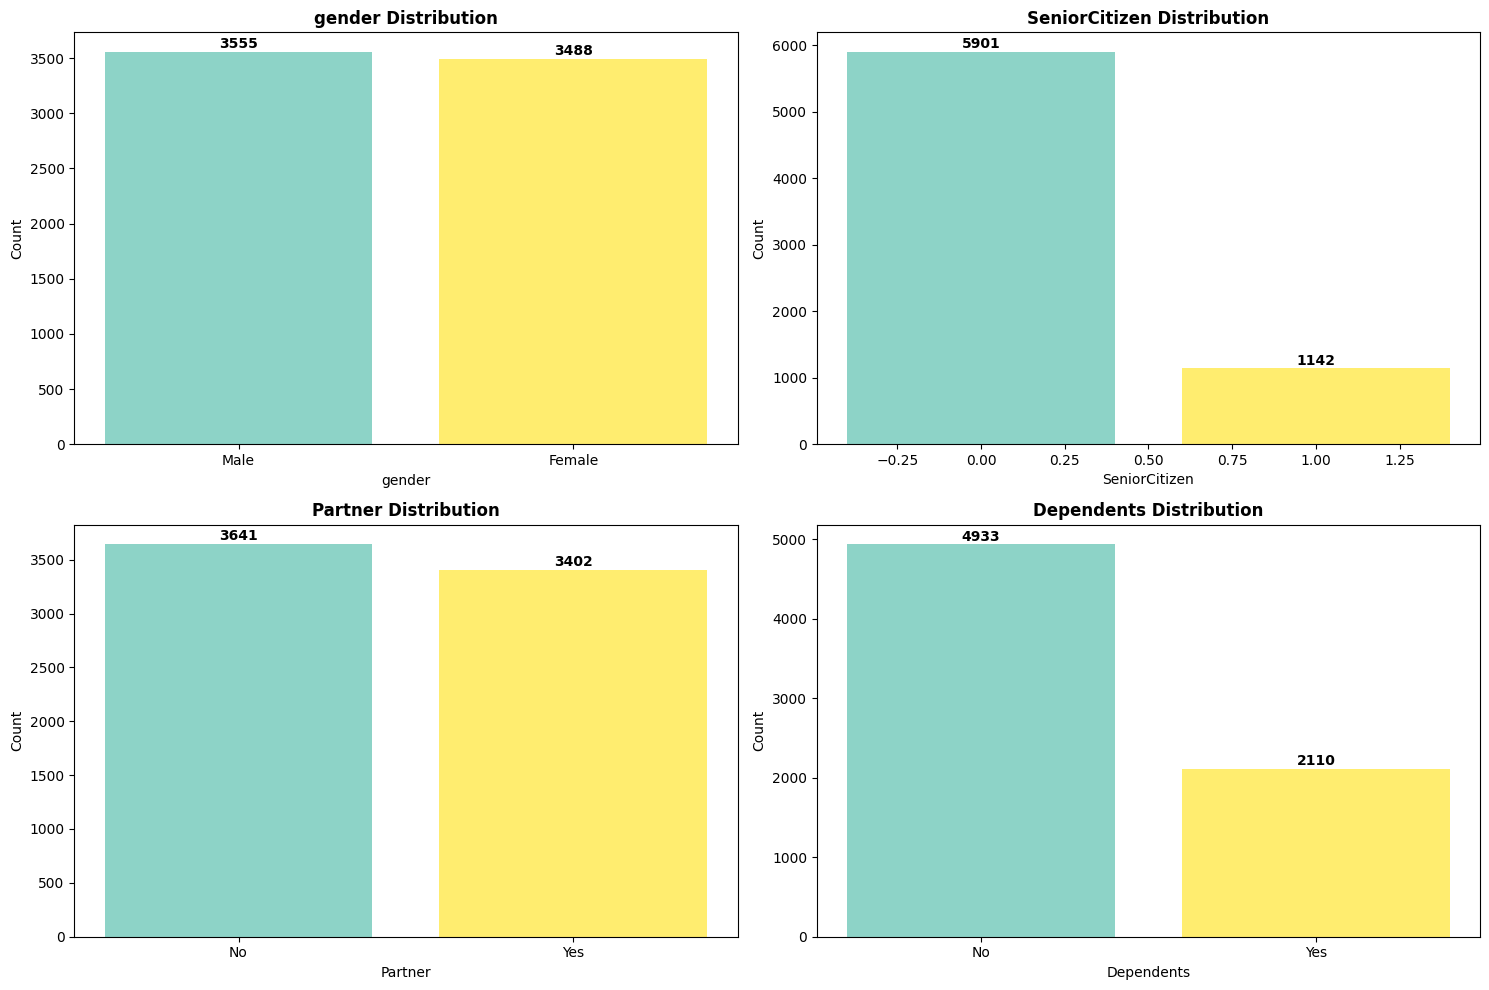

In [8]:
# Demographic features visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(demographic_features):
    counts = df[feature].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(counts)))
    
    bars = axes[i].bar(counts.index, counts.values, color=colors)
    axes[i].set_title(f'{feature} Distribution', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # Rotate x-axis labels if needed
    if len(counts) > 3:
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

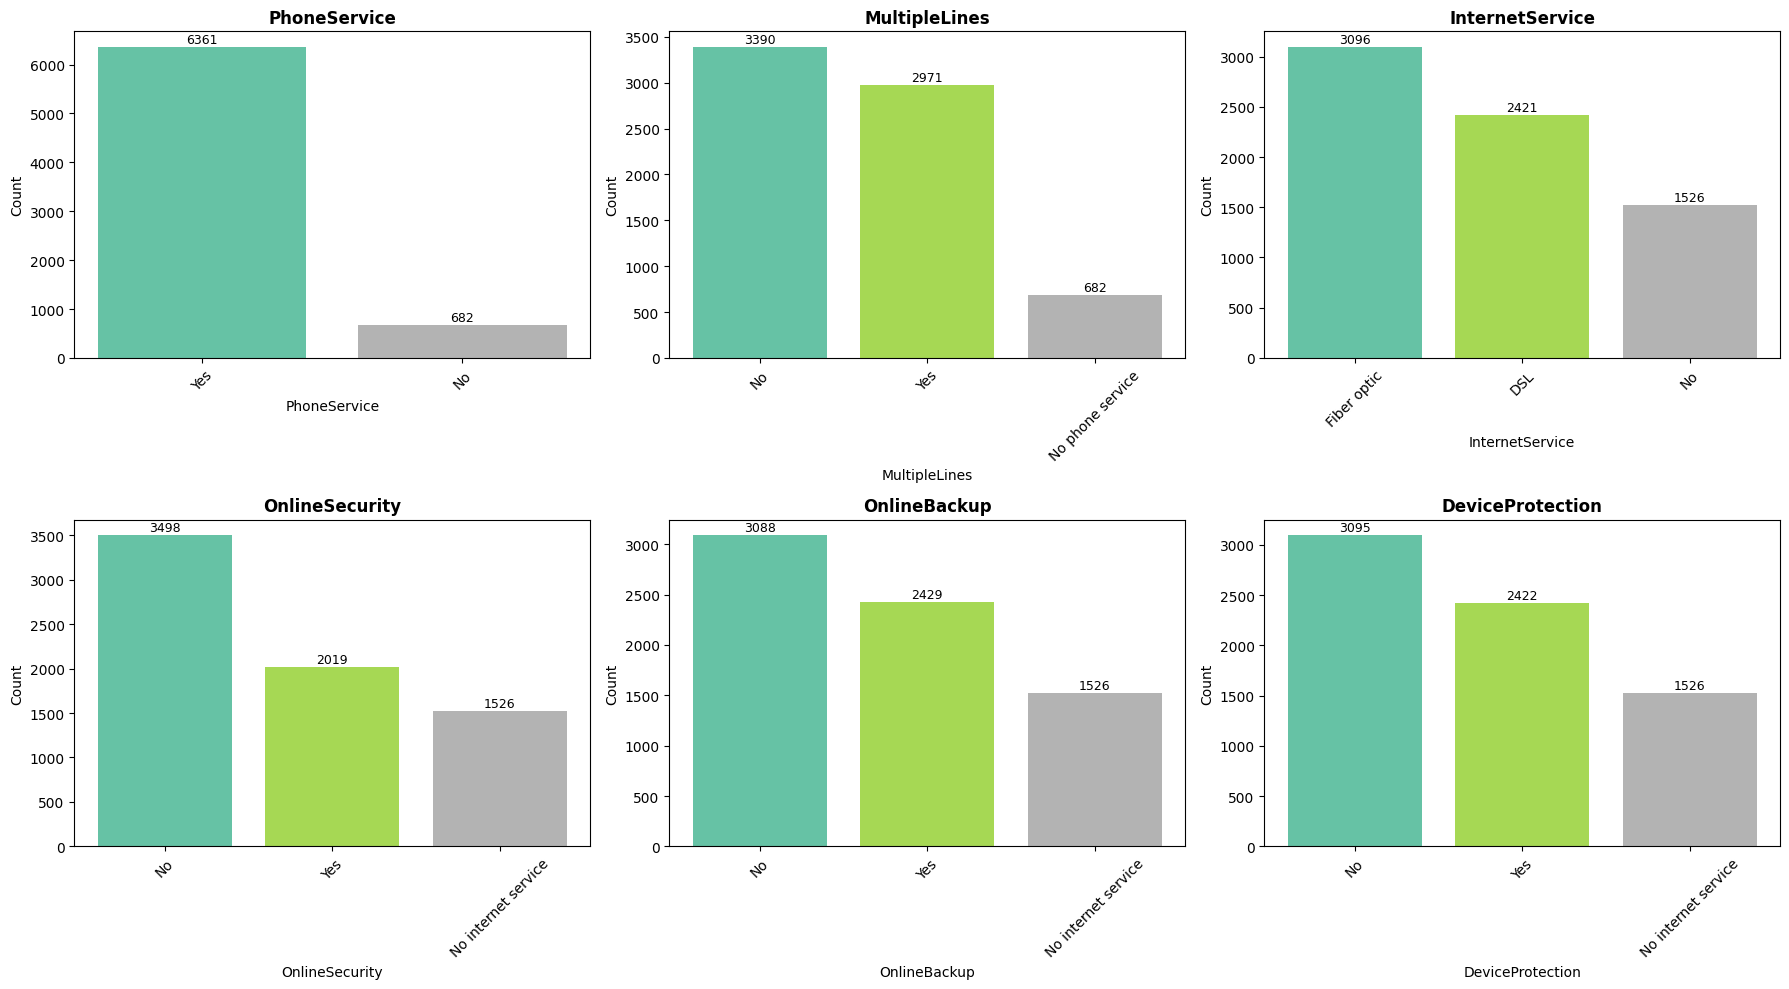

In [9]:
# Service features visualization (first 6)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(service_features[:6]):
    counts = df[feature].value_counts()
    colors = plt.cm.Set2(np.linspace(0, 1, len(counts)))
    
    bars = axes[i].bar(counts.index, counts.values, color=colors)
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

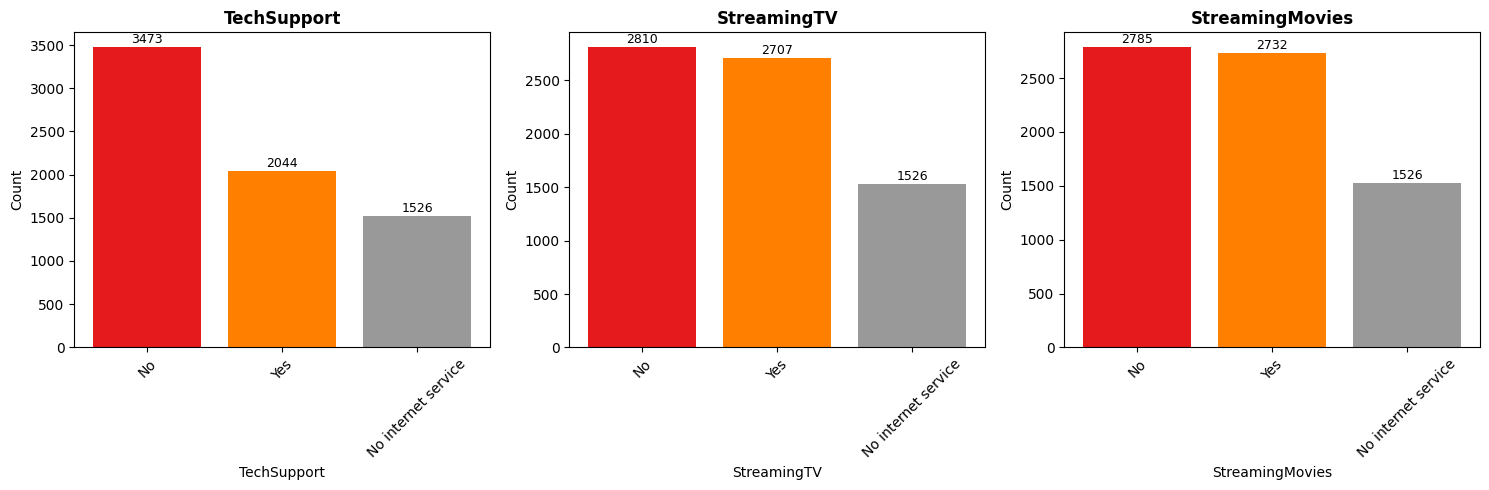

In [10]:
# Service features visualization (remaining)
remaining_services = service_features[6:]
if remaining_services:
    n_features = len(remaining_services)
    fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 5))
    if n_features == 1:
        axes = [axes]
    
    for i, feature in enumerate(remaining_services):
        counts = df[feature].value_counts()
        colors = plt.cm.Set1(np.linspace(0, 1, len(counts)))
        
        bars = axes[i].bar(counts.index, counts.values, color=colors)
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add count labels
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 10,
                        f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

### 6. Bivariate Analysis - Churn vs Demographic Features

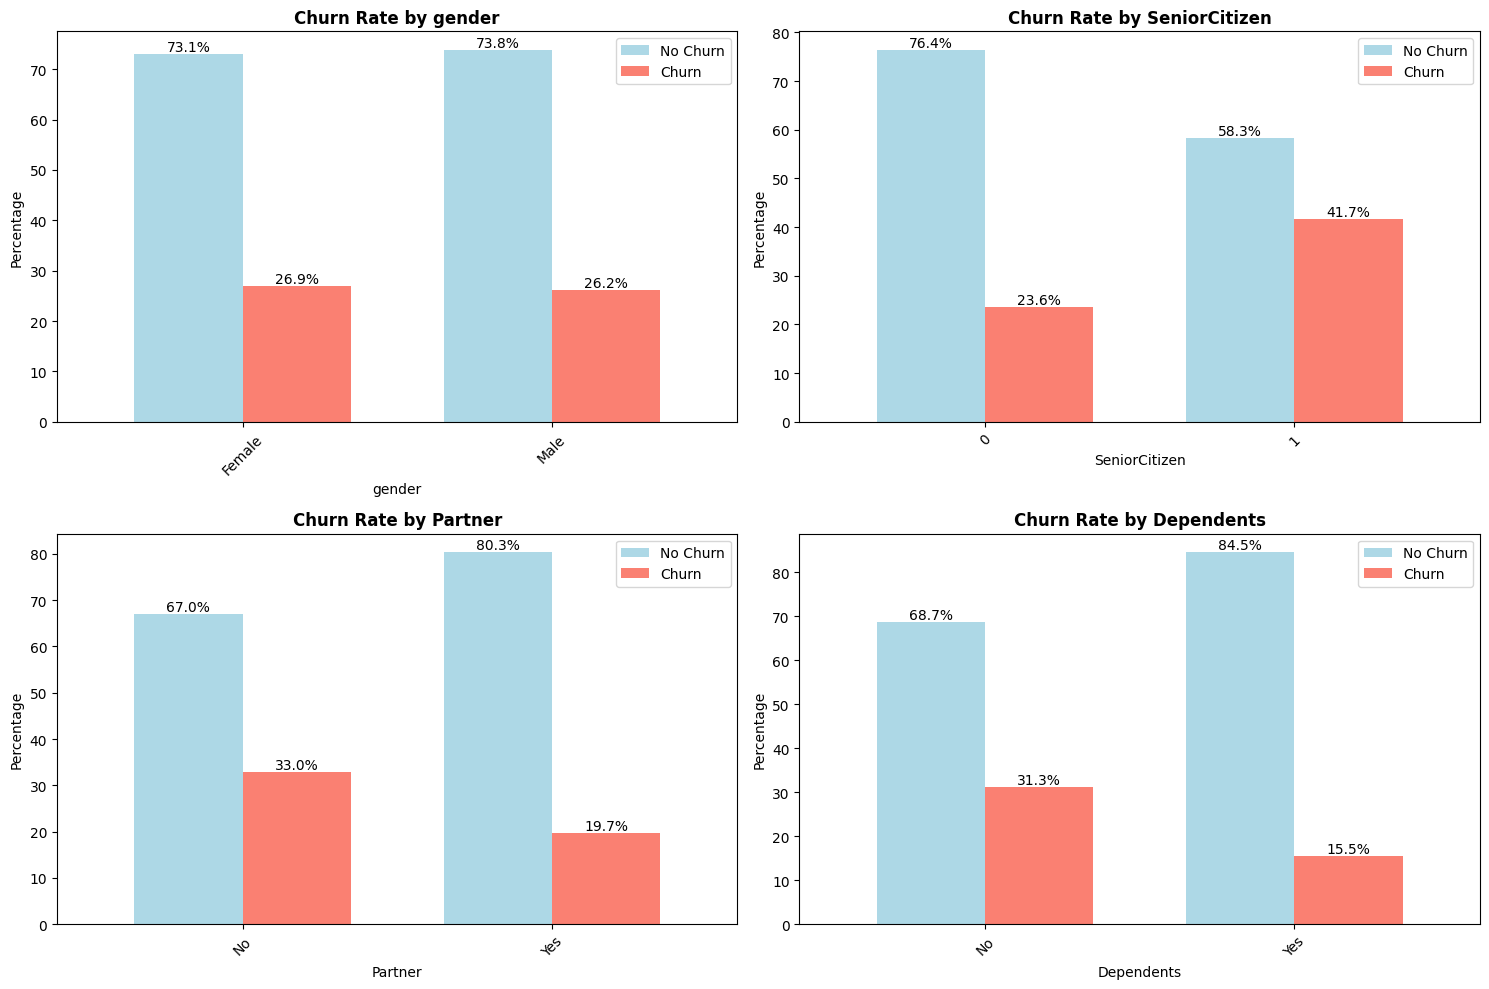

In [11]:
# Demographic features vs Churn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(demographic_features):
    # Create crosstab
    crosstab = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Plot stacked bar chart
    crosstab.plot(kind='bar', ax=axes[i], color=['lightblue', 'salmon'], 
                 stacked=False, width=0.7)
    axes[i].set_title(f'Churn Rate by {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Churn', 'Churn'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

### 7. Bivariate Analysis - Churn vs Financial Features

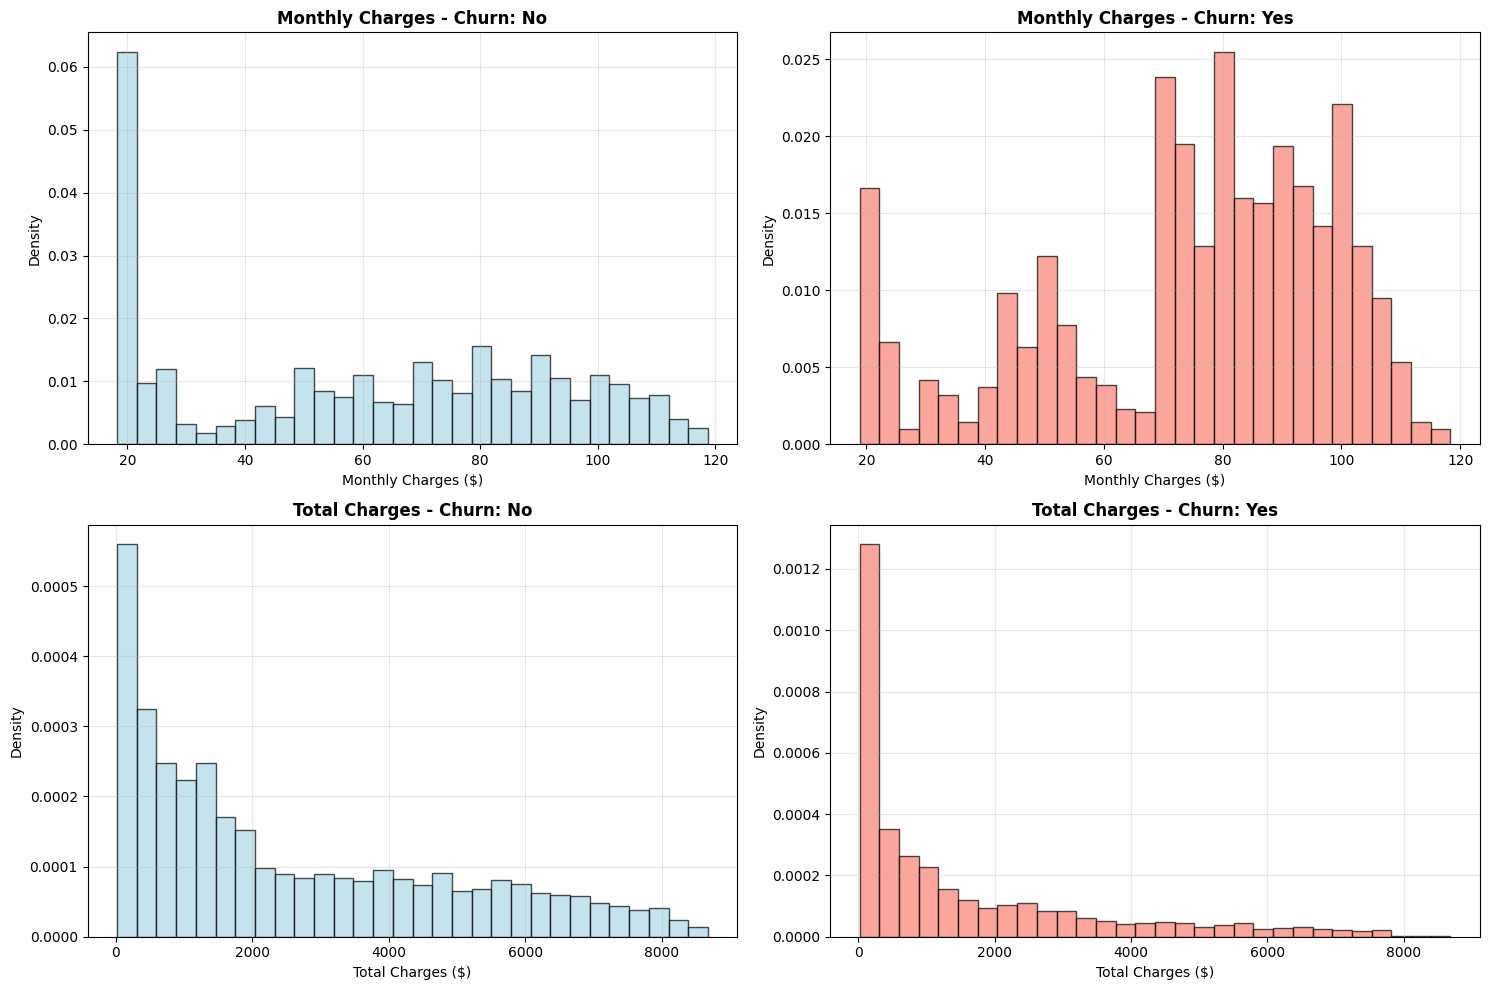

In [12]:
# Financial features vs Churn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly Charges distribution by Churn
for i, churn_status in enumerate(['No', 'Yes']):
    data = df[df['Churn'] == churn_status]['MonthlyCharges'].dropna()
    axes[0, i].hist(data, bins=30, alpha=0.7, color='lightblue' if churn_status == 'No' else 'salmon',
                    density=True, edgecolor='black')
    axes[0, i].set_title(f'Monthly Charges - Churn: {churn_status}', fontweight='bold')
    axes[0, i].set_xlabel('Monthly Charges ($)')
    axes[0, i].set_ylabel('Density')
    axes[0, i].grid(True, alpha=0.3)

# Total Charges distribution by Churn
for i, churn_status in enumerate(['No', 'Yes']):
    data = df[df['Churn'] == churn_status]['TotalCharges'].dropna()
    axes[1, i].hist(data, bins=30, alpha=0.7, color='lightblue' if churn_status == 'No' else 'salmon',
                    density=True, edgecolor='black')
    axes[1, i].set_title(f'Total Charges - Churn: {churn_status}', fontweight='bold')
    axes[1, i].set_xlabel('Total Charges ($)')
    axes[1, i].set_ylabel('Density')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

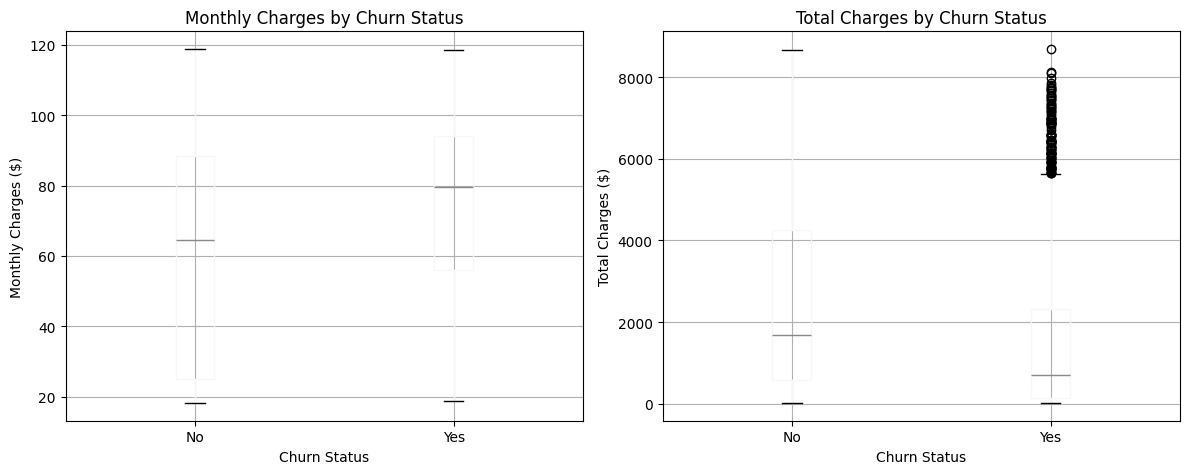

In [13]:
# Box plots for financial features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Monthly Charges boxplot
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0])
axes[0].set_title('Monthly Charges by Churn Status')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Monthly Charges ($)')

# Total Charges boxplot
df.boxplot(column='TotalCharges', by='Churn', ax=axes[1])
axes[1].set_title('Total Charges by Churn Status')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Total Charges ($)')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

### 8. Bivariate Analysis - Churn vs Service Features

<Figure size 1000x600 with 0 Axes>

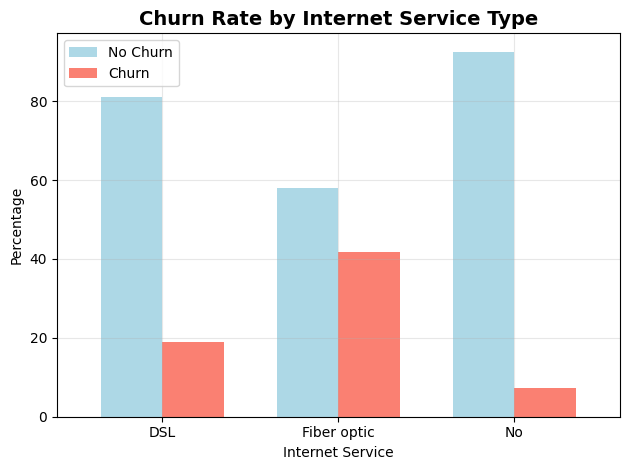

Churn rates by Internet Service:
DSL            : 19.0%
Fiber optic    : 41.9%
No             : 7.4%


In [14]:
# Internet Service vs Churn
plt.figure(figsize=(10, 6))
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', color=['lightblue', 'salmon'], width=0.7)
plt.title('Churn Rate by Internet Service Type', fontweight='bold', fontsize=14)
plt.xlabel('Internet Service')
plt.ylabel('Percentage')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Churn rates by Internet Service:")
for service in internet_churn.index:
    churn_rate = internet_churn.loc[service, 'Yes']
    print(f"{service:15s}: {churn_rate:.1f}%")

<Figure size 1000x600 with 0 Axes>

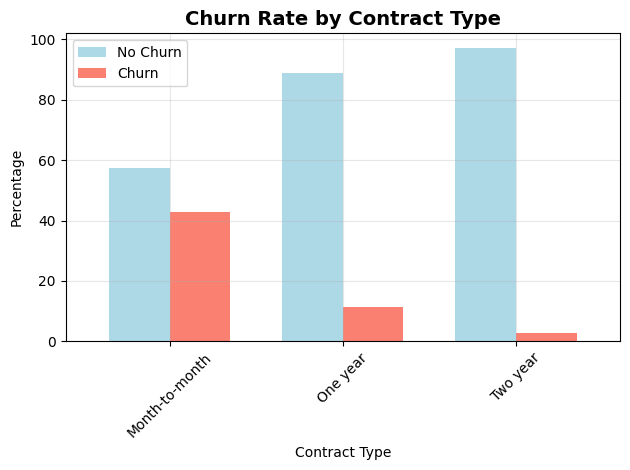

Churn rates by Contract Type:
Month-to-month      : 42.7%
One year            : 11.3%
Two year            : 2.8%


In [15]:
# Contract type vs Churn
plt.figure(figsize=(10, 6))
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', color=['lightblue', 'salmon'], width=0.7)
plt.title('Churn Rate by Contract Type', fontweight='bold', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Churn rates by Contract Type:")
for contract in contract_churn.index:
    churn_rate = contract_churn.loc[contract, 'Yes']
    print(f"{contract:20s}: {churn_rate:.1f}%")

### 9. Bivariate Analysis - Tenure vs Churn

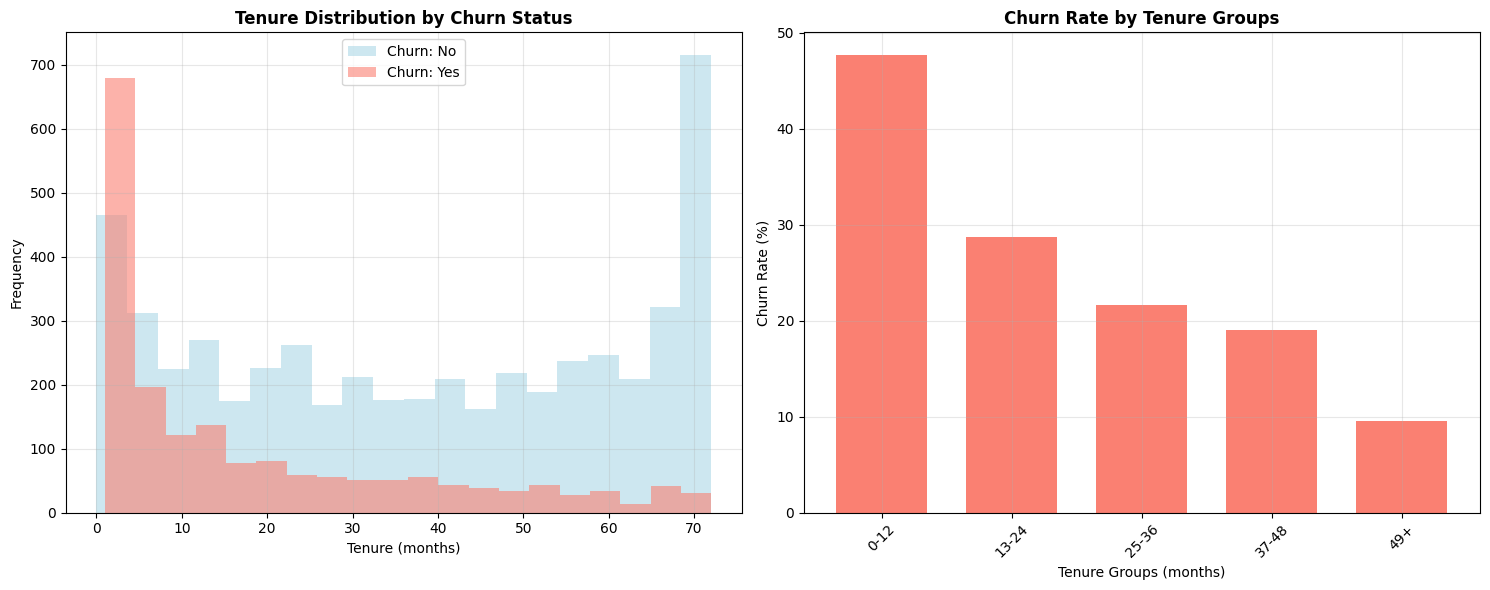

Churn rates by Tenure Groups:
0-12 months: 47.7%
13-24 months: 28.7%
25-36 months: 21.6%
37-48 months: 19.0%
49+ months: 9.5%


In [16]:
# Tenure analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Tenure distribution by churn
for churn_status in ['No', 'Yes']:
    data = df[df['Churn'] == churn_status]['tenure']
    axes[0].hist(data, bins=20, alpha=0.6, 
                label=f'Churn: {churn_status}',
                color='lightblue' if churn_status == 'No' else 'salmon')

axes[0].set_title('Tenure Distribution by Churn Status', fontweight='bold')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Churn rate by tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 100], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49+'])
tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100
tenure_churn['Yes'].plot(kind='bar', ax=axes[1], color='salmon', width=0.7)
axes[1].set_title('Churn Rate by Tenure Groups', fontweight='bold')
axes[1].set_xlabel('Tenure Groups (months)')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Churn rates by Tenure Groups:")
for group in tenure_churn.index:
    churn_rate = tenure_churn.loc[group, 'Yes']
    print(f"{group} months: {churn_rate:.1f}%")

### 10. Statistical Significance Testing

In [17]:
# Chi-square tests for categorical features
print("CHI-SQUARE TESTS - Categorical Features vs Churn")
print("=" * 55)
print(f"{'Feature':<20} {'Chi2 Statistic':<15} {'p-value':<15} {'Significant':<12}")
print("-" * 70)

significant_features = []
for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Determine significance
    is_significant = p_value < 0.05
    if is_significant:
        significant_features.append(feature)
    
    print(f"{feature:<20} {chi2:<15.3f} {p_value:<15.6f} {'Yes' if is_significant else 'No':<12}")

print(f"\nSignificant features ({len(significant_features)}): {significant_features}")

CHI-SQUARE TESTS - Categorical Features vs Churn
Feature              Chi2 Statistic  p-value         Significant 
----------------------------------------------------------------------
customerID           7043.000        0.494398        No          
gender               0.484           0.486579        No          
Partner              158.733         0.000000        Yes         
Dependents           189.129         0.000000        Yes         
PhoneService         0.915           0.338783        No          
MultipleLines        11.330          0.003464        Yes         
InternetService      732.310         0.000000        Yes         
OnlineSecurity       849.999         0.000000        Yes         
OnlineBackup         601.813         0.000000        Yes         
DeviceProtection     558.419         0.000000        Yes         
TechSupport          828.197         0.000000        Yes         
StreamingTV          374.204         0.000000        Yes         
StreamingMovies      3

In [18]:
# T-tests for numerical features
from scipy.stats import ttest_ind

print("\nT-TESTS - Numerical Features vs Churn")
print("=" * 45)
print(f"{'Feature':<15} {'T-statistic':<15} {'p-value':<15} {'Significant':<12}")
print("-" * 60)

for feature in numerical_features:
    # Get data for churned and non-churned customers
    no_churn = df[df['Churn'] == 'No'][feature].dropna()
    yes_churn = df[df['Churn'] == 'Yes'][feature].dropna()
    
    # Perform t-test
    t_stat, p_value = ttest_ind(no_churn, yes_churn)
    
    # Determine significance
    is_significant = p_value < 0.05
    
    print(f"{feature:<15} {t_stat:<15.3f} {p_value:<15.6f} {'Yes' if is_significant else 'No':<12}")


T-TESTS - Numerical Features vs Churn
Feature         T-statistic     p-value         Significant 
------------------------------------------------------------
SeniorCitizen   -12.808         0.000000        Yes         
tenure          31.580          0.000000        Yes         
MonthlyCharges  -16.537         0.000000        Yes         
TotalCharges    17.069          0.000000        Yes         


### 11. Correlation Analysis

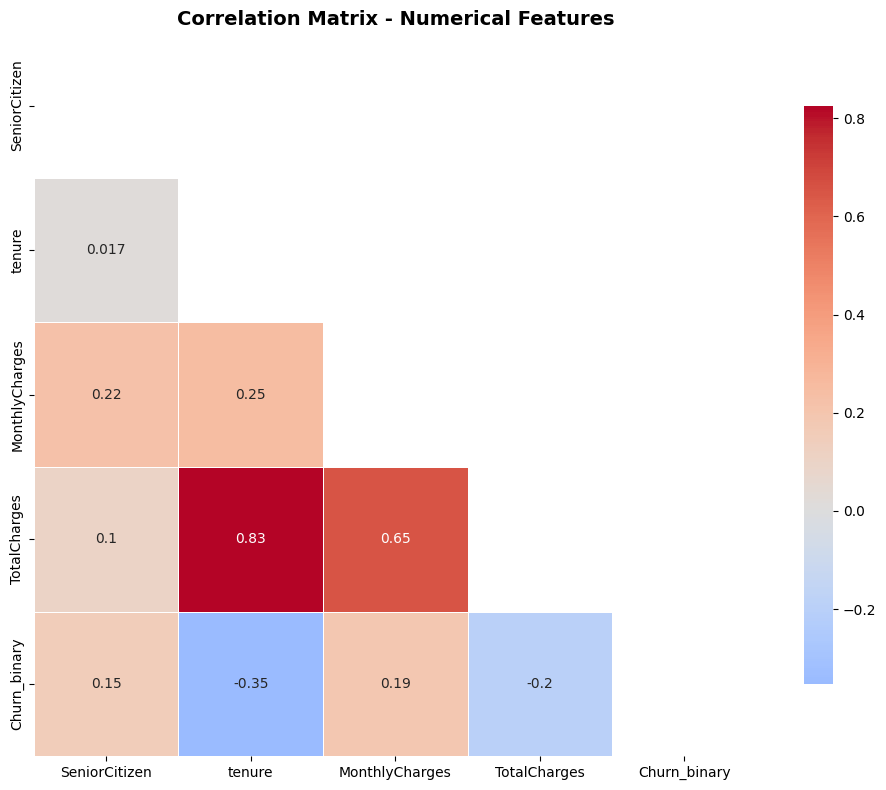

Correlations with Churn:
tenure         : -0.352
TotalCharges   : -0.199
MonthlyCharges :  0.193
SeniorCitizen  :  0.151


In [19]:
# Correlation matrix for numerical features
# Create binary target for correlation
df_corr = df.copy()
df_corr['Churn_binary'] = (df_corr['Churn'] == 'Yes').astype(int)

# Calculate correlation matrix
corr_features = numerical_features + ['Churn_binary']
correlation_matrix = df_corr[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, mask=mask)
plt.title('Correlation Matrix - Numerical Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# Print correlations with churn
print("Correlations with Churn:")
churn_correlations = correlation_matrix['Churn_binary'].drop('Churn_binary').sort_values(key=abs, ascending=False)
for feature, corr in churn_correlations.items():
    print(f"{feature:<15}: {corr:6.3f}")

### 12. Key Insights Summary

In [20]:
# Calculate key insights
churn_rate = (df['Churn'] == 'Yes').mean() * 100

# High-risk segments
fiber_churn = df[df['InternetService'] == 'Fiber optic']['Churn'].value_counts(normalize=True)['Yes'] * 100
monthly_contract_churn = df[df['Contract'] == 'Month-to-month']['Churn'].value_counts(normalize=True)['Yes'] * 100
new_customer_churn = df[df['tenure'] <= 12]['Churn'].value_counts(normalize=True)['Yes'] * 100

# Financial insights
avg_monthly_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
avg_monthly_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

print("EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("=" * 50)
print(f"\n📊 OVERALL METRICS:")
print(f"   • Overall churn rate: {churn_rate:.1f}%")
print(f"   • Customer base: {len(df):,} customers")
print(f"   • Class imbalance ratio: {(df['Churn']=='No').sum()/(df['Churn']=='Yes').sum():.1f}:1")

print(f"\n🔥 HIGH-RISK SEGMENTS:")
print(f"   • Fiber optic customers: {fiber_churn:.1f}% churn rate")
print(f"   • Month-to-month contracts: {monthly_contract_churn:.1f}% churn rate")
print(f"   • New customers (≤12 months): {new_customer_churn:.1f}% churn rate")

print(f"\n💰 FINANCIAL INSIGHTS:")
print(f"   • Avg monthly charges (churned): ${avg_monthly_churned:.2f}")
print(f"   • Avg monthly charges (retained): ${avg_monthly_retained:.2f}")
print(f"   • Premium pricing impact: ${avg_monthly_churned - avg_monthly_retained:.2f} higher for churned")

print(f"\n🎯 STATISTICALLY SIGNIFICANT FEATURES:")
print(f"   • Categorical features: {len(significant_features)} out of {len(categorical_features)}")
print(f"   • Most significant: {significant_features[:5] if len(significant_features) >= 5 else significant_features}")

print(f"\n📈 NEXT STEPS:")
print(f"   1. Feature engineering for tenure groups and service adoption")
print(f"   2. Handle missing values in TotalCharges")
print(f"   3. Create derived features for customer value segments")
print(f"   4. Prepare features for ensemble modeling")

EXPLORATORY DATA ANALYSIS - KEY INSIGHTS

📊 OVERALL METRICS:
   • Overall churn rate: 26.5%
   • Customer base: 7,043 customers
   • Class imbalance ratio: 2.8:1

🔥 HIGH-RISK SEGMENTS:
   • Fiber optic customers: 41.9% churn rate
   • Month-to-month contracts: 42.7% churn rate
   • New customers (≤12 months): 47.4% churn rate

💰 FINANCIAL INSIGHTS:
   • Avg monthly charges (churned): $74.44
   • Avg monthly charges (retained): $61.27
   • Premium pricing impact: $13.18 higher for churned

🎯 STATISTICALLY SIGNIFICANT FEATURES:
   • Categorical features: 13 out of 16
   • Most significant: ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity']

📈 NEXT STEPS:
   1. Feature engineering for tenure groups and service adoption
   2. Handle missing values in TotalCharges
   3. Create derived features for customer value segments
   4. Prepare features for ensemble modeling


### 13. Save EDA Results

In [21]:
# Save EDA insights and processed data for next notebook
eda_insights = {
    'churn_rate': churn_rate,
    'high_risk_segments': {
        'fiber_optic_churn_rate': fiber_churn,
        'monthly_contract_churn_rate': monthly_contract_churn,
        'new_customer_churn_rate': new_customer_churn
    },
    'significant_categorical_features': significant_features,
    'feature_categories': {
        'demographic': demographic_features,
        'account': account_features,
        'service': service_features,
        'financial': financial_features
    }
}

# Save data with tenure groups for feature engineering
df_with_insights = df.copy()
df_with_insights.to_csv(r'D:\MY\Personal Projects\Zuu-Crew Projects\Building Production Ready ML Systems\Advance Telco Customer Churn Prediction\notebooks\artifacts\processed\telco_eda_complete.csv', index=False)

print("EDA completed successfully!")
print(f"Data with insights saved to: D:\MY\Personal_Projects\Zuu-Crew Projects\Building Production Ready ML Systems\Advance Telco Customer Churn Prediction\notebooks\artifacts\processed\telco_eda_complete.csv")
print(f"Ready for feature engineering...")

EDA completed successfully!
Data with insights saved to: D:\MY\Personal_Projects\Zuu-Crew Projects\Building Production Ready ML Systems\Advance Telco Customer Churn Prediction
otebooksrtifacts\processed	elco_eda_complete.csv
Ready for feature engineering...
